In [1]:
# module to pull data out of html and xml files
#!pip install bs4

# request to allow HTTP/1.1 request to be sent, not built-in in Python
#!pip install requests

#!pip install selenium

1. Go to in.indeed.com and search for a job at a location: data scientist internship at Uttar Pradesh<br>
2. Here is the URL we got: " https://<span style="color: green;">in.indeed.com/jobs</span>?q=<span style="color: red;">Data+Scientist+Internship</span>&l=<span style="color: red;">Uttar+Pradesh</span> "<br>

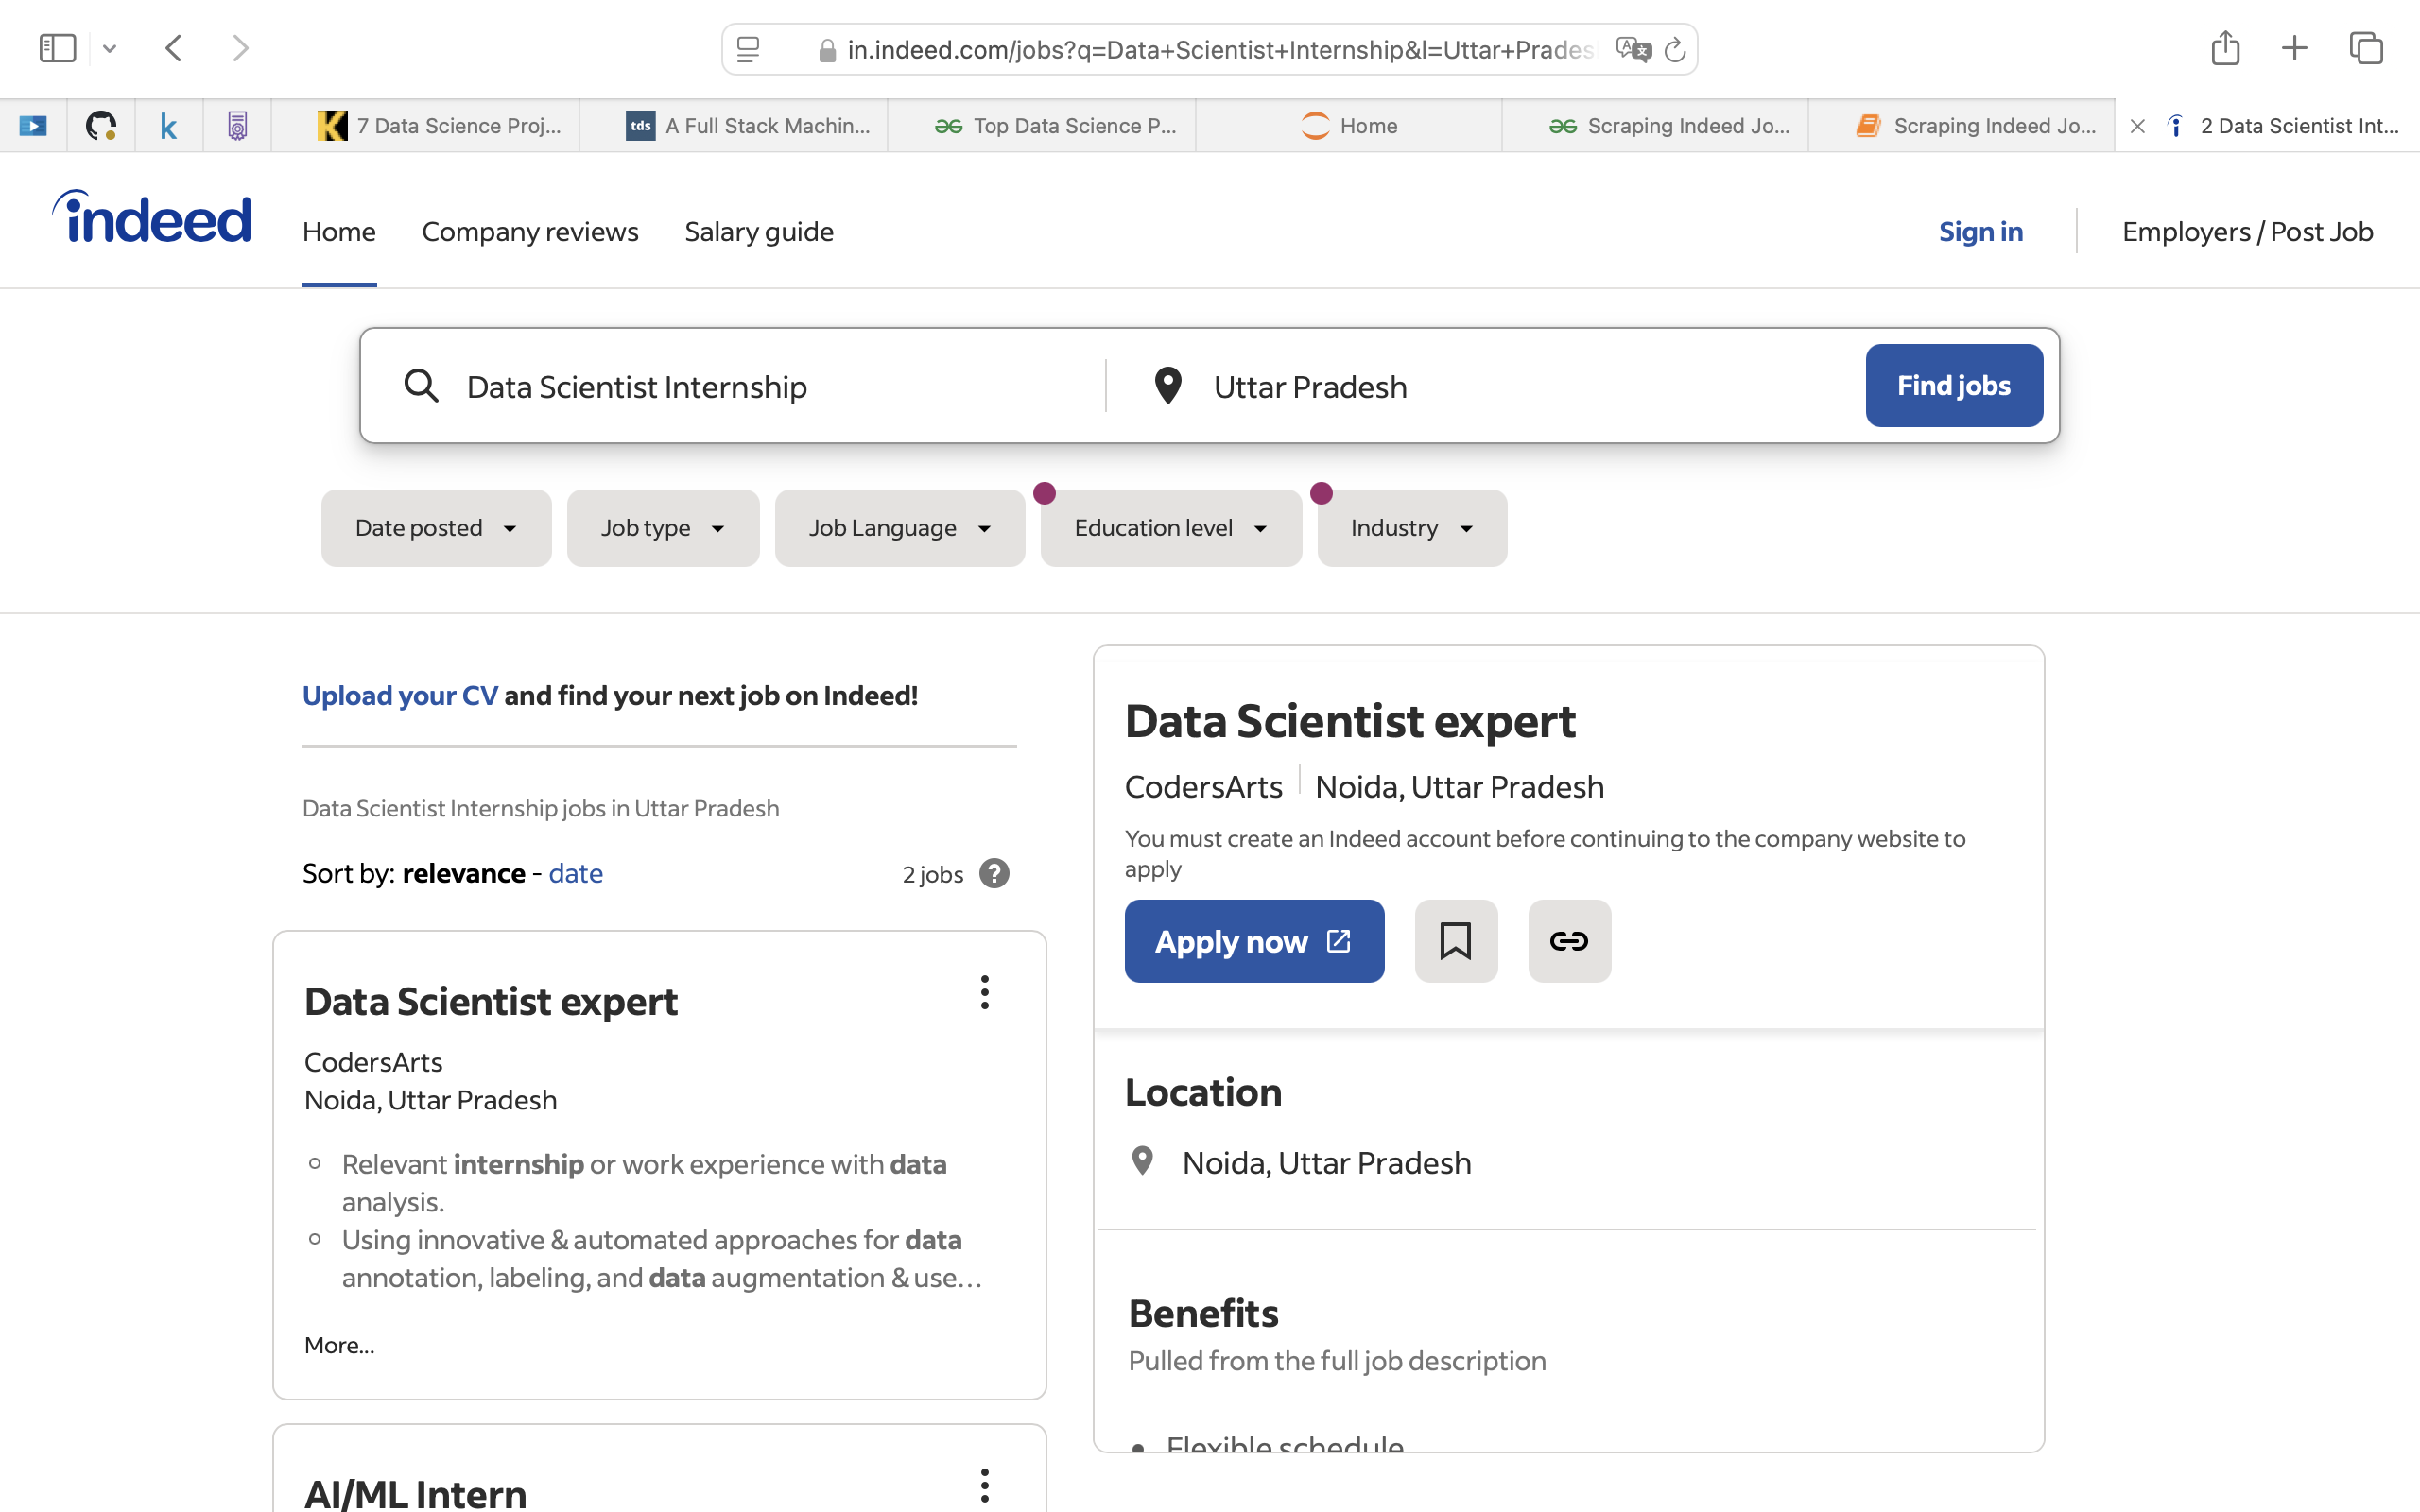

In [2]:
# Import necessary modules
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time

# Function to get rendered HTML using Selenium (get dynamic data from page)
def get_rendered_html(url):
    try:
        # Open Chrome and get to the linked page
        driver = webdriver.Chrome()
        driver.get(url)

        # Wait only until the job listings are visible or timeout occurs
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, "jcs-JobTitle"))
        )

        # Get the page source
        rendered_html = driver.page_source
        status = "Success"  # Job titles found
    except TimeoutException:
        # Handle case where no job titles are found
        rendered_html = None
        status = "No job titles found"
    finally:
        # Ensure Chrome is closed in all cases
        driver.quit()

    return {"html": rendered_html, "status": status}

# Parse HTML using BeautifulSoup
def html_code(url):
    response = get_rendered_html(url)
    if response["status"] == "Success":
        soup = BeautifulSoup(response["html"], 'html.parser')
        return soup, response["status"]
    else:
        return None, response["status"]

# Filter job data using find_all
def job_data(soup):
    # Extract job titles based on the new class
    result_1 = [item.get_text().strip() for item in soup.find_all("a", class_="jcs-JobTitle")]
    return result_1

# Filter company data using find_all
def company_data(soup):
    # Extract company names based on the span with specific class
    result_2 = [item.get_text().strip() for item in soup.find_all("span", class_="css-1h7lukg eu4oa1w0")]
    return result_2

# Filter company location using find_all
def location_data(soup):
    # Extract company locations based on the div with specific class
    result_3 = [item.get_text().strip() for item in soup.find_all("div", class_="css-1restlb eu4oa1w0")]
    return result_3

# Main function
if __name__ == "__main__":
    # Ask the user to input data for URL
    job = input("Enter the job title, keywords, or company: ").strip()
    location = input("Enter the city, state, or zipcode: ").strip()
    print("Looking for jobs for you on in.indeed.com...Almost there... \n")
    url = f"https://in.indeed.com/jobs?q={job}&l={location}"

    # Get HTML and parse it
    soup, status = html_code(url)

    if status == "Success":
        # Extract the job data
        job_res = job_data(soup)

        if len(job_res) > 0:
            # Extract the company data
            company_res = company_data(soup)

            # Extract the location data
            loc_res = location_data(soup)

            print(f"Woohoo! Found {len(job_res)} jobs for you! \n")
            # Print the job results
            for i in range(len(job_res)):
                print("Company Name: ", company_res[i])
                print("Company Location: ", loc_res[i])
                print("Job: ", job_res[i])
                if i < len(job_res) - 1:
                    print("----------------------------------")
        else:
            print("Oops! No job listings found on in.indeed.com.(1)")
    else:
        print("Oops! No job listings found on in.indeed.com.(2)")

Enter the job title, keywords, or company:  data science intern
Enter the city, state, or zipcode:  chennai


Looking for jobs for you on in.indeed.com...Almost there... 

Woohoo! Found 10 jobs for you! 

Company Name:  Qualcomm
Company Location:  Chennai, Tamil Nadu
Job:  1 year Internship_SW_CDC
----------------------------------
Company Name:  Fifth Generation Technologies
Company Location:  Chennai, Tamil Nadu
Job:  Programming Interns (3-4 months)
----------------------------------
Company Name:  Akra Tech
Company Location:  Chennai, Tamil Nadu
Job:  Interns - AI Developer
----------------------------------
Company Name:  MercuryMinds
Company Location:  Remote in Chennai, Tamil Nadu
Job:  Data Science Intern
----------------------------------
Company Name:  HERE AND NOW - The French Institute
Company Location:  Aminjikarai, Chennai, Tamil Nadu
Job:  AI Intern
----------------------------------
Company Name:  Energetics AI
Company Location:  Karapakkam, Chennai, Tamil Nadu
Job:  Backend Developer Intern
----------------------------------
Company Name:  Bahwan Cybertek Group
Company Locatio

* Note: If the website requires additional verification and closed itself, try close this file and open a new one...